In [237]:
from ECStripLengthNoiseComparison import ECStripLengthNoiseComparison
import glob
import json
import fnmatch

subtypes = []
allBarrelSubtypes = ["SSX", "SSY", "LSX", "LSY"]
with open("../Helpers/subtypes.txt", 'r') as f:
    allECSubtypes = f.read().split(',')
allSubtypes = []
allSubtypes.extend(allECSubtypes)
allSubtypes.extend(allBarrelSubtypes)
subtypes = allSubtypes

In [238]:
dataPath = "../../../data/fromLuise/"
files = glob.glob(dataPath + "**/*RESPONSE_CURVE_PPA.json", recursive=True)

In [239]:
jsons = []
for file in files:
    with open(file, "r") as f:
        jsons.append(json.load(f))

In [240]:
import sys
sys.path.append("../../")
from parsers.RCparsers import parseRC
import matplotlib.pyplot as plt
import numpy as np

In [241]:
hybrids = {}
for f, file in enumerate(files):
    split = file.split("_")
    subtype = fnmatch.filter(split, "R?H?")
    if subtype:
        subtype = subtype[0]
        if subtype not in hybrids.keys():
            hybrids[subtype] = []
        hybrids[subtype].append(parseRC(file, verbose=False))
subtypes = list(hybrids.keys())

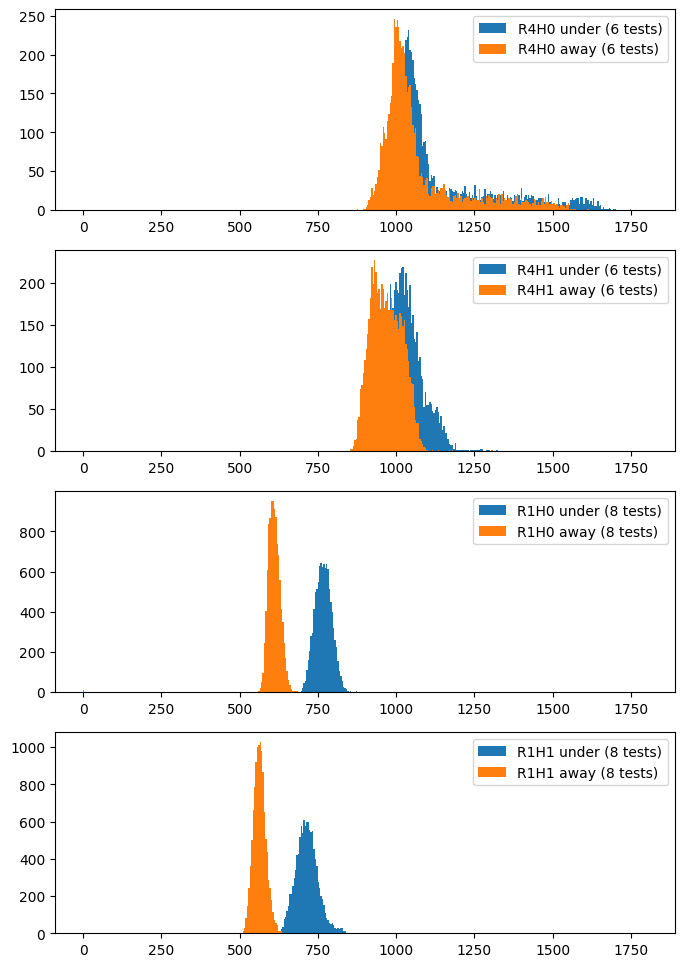

In [242]:
fig, axs = plt.subplots(len(subtypes), figsize=(8, 12))
streamName = {0 : "under", 1 : "away"}
for ax, subtype in zip(axs, subtypes):
    for stream in [0, 1]:
        innses = []
        for hybrid in hybrids[subtype]:
            innses.extend([channel.innse for channel in hybrid.getStream(stream)])
        ax.hist(innses, bins=np.linspace(0, 1800, 400),
                label=subtype+" "+streamName[stream]+" ("+str(len(hybrids[subtype]))+" tests)")
    ax.legend()

In [223]:
def findKey(dct, targetKey, partial=True, verbose=True):
    values = []
    if isinstance(dct, dict):
        for key in dct.keys():
            if key == targetKey:
                values.append(dct[key])
                if verbose:
                    print(dct[key])
                    print()
            elif targetKey in key and partial:
                values.append(dct[key])
                if verbose:
                    print("Partial key match;", key, dct[key])
                    print()
            else:
                values.extend(findKey(dct[key], targetKey, partial=partial, verbose=verbose))
    if isinstance(dct, list):
        for item in dct:
            findKey(item, targetKey, partial=partial, verbose=verbose)
    return values

In [232]:
for js in jsons:
    findKey(js, "runNumber")

2633-6

2633-9

2626-3

2633-9

2626-3

2626-6

2633-6

2626-6

2255-3

2255-3

2255-6

2255-6

2257-3

2257-3

2257-6

2257-6

2049-6

2049-6

2049-3

2049-3

2378-3

2378-6

2378-6

2378-3

2623-6

2620-3

2622-3

2622-6

2623-3

2620-3

2622-6

2620-6

2623-6

2620-6

2622-3

2623-3

2616-5

2614-3

2617-3

2614-6

2616-8

2617-3

2616-5

2616-8

2617-6

2614-6

2617-6

2614-3



In [13]:
js.keys()

dict_keys(['comments', 'date', 'defects', 'passed', 'problems', 'properties', 'results', 'runNumber', 'testType'])

In [27]:
for key in js:
    print(js[key] if key != "results" else None)

['12 defects found affecting 13 strips', '2 maximum consecutive defects', 'FAIL due to chip 4 (under) noise sigma (> 25.000000)', 'FAIL due to chip 5 (under) noise sigma (> 25.000000)']
2023-01-26T21:29:05.000Z
[{'description': 'Strip with high noise', 'name': 'NOISY', 'properties': {'channel': 0, 'chip_bank': 'under', 'chip_in_histo': 0}}, {'description': 'Strip with high noise', 'name': 'NOISY', 'properties': {'channel': 596, 'chip_bank': 'under', 'chip_in_histo': 4}}, {'description': 'Strip with high noise', 'name': 'NOISY', 'properties': {'channel': 598, 'chip_bank': 'under', 'chip_in_histo': 4}}, {'description': 'Strip with high noise', 'name': 'NOISY', 'properties': {'channel_from': 601, 'channel_to': 602, 'chip_bank': 'under', 'chip_in_histo': 4}}, {'description': 'Strip with high noise', 'name': 'NOISY', 'properties': {'channel': 609, 'chip_bank': 'under', 'chip_in_histo': 4}}, {'description': 'Strip with high noise', 'name': 'NOISY', 'properties': {'channel': 651, 'chip_bank':

In [28]:
files

['../../../data/fromLuise/M20/SN20USEHA0000044_20230126_2633_6_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/M20/SN20USEHA0000044_20230126_2633_9_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/M20/DENNIS_PPB_ABCStar_R4H0_Hybrid1_20230126_2626_3_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/M20/SN20USEH90000039_20230126_2633_9_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/M20/DENNIS_PPB_ABCStar_R4H1_Hybrid0_20230126_2626_3_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/M20/DENNIS_PPB_ABCStar_R4H1_Hybrid0_20230126_2626_6_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/M20/SN20USEH90000039_20230126_2633_6_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/M20/DENNIS_PPB_ABCStar_R4H0_Hybrid1_20230126_2626_6_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/20USEM1000001/20USEM10000013/DENNIS_PPB_ABCStar_R1H0_Hybrid1_20221209_2255_3_RESPONSE_CURVE_PPA.json',
 '../../../data/fromLuise/20USEM1000001/20USEM10000013/DENNIS_PPB_ABCStar_R1H1_Hybrid0_20221209_225

In [30]:
import itkdb
user = itkdb.core.User(accessCode1="", accessCode2="")
user.authenticate()
client = itkdb.Client(user=user)

In [172]:
SNs = []
for file in files:
    sn = None
    parts = file.split("/")
    for part in parts:
        subparts = part.split("_")
        for subpart in subparts:
            if "20USE" in subpart:
                sn = subpart
                break
    if sn:
        if sn[:2] == "SN":
            sn = sn[2:]
        SNs.append(sn)
SNs = list(set(SNs))
print("Number of files:", len(files))
print("Unique SNs gathered:", len(SNs))

Number of files: 48
Unique SNs gathered: 10


In [173]:
components = []
for sn in SNs:
    try:
        component = client.get("getComponent", json={"component":sn})
    except Exception as exception:
        print("Component", sn, "not found. Exception raised:", exception)
    components.append(component)

In [177]:
IDfiles = glob.glob("../../data/*.json")

In [178]:
for IDfile in IDfiles:
    if "638015ac70e4de0028684e50" in IDfile:
        print(IDfile)

In [209]:
def checkIDs(IDs, IDfiles):
    if isinstance(IDs, list):
        for ID in IDs:
            checkIDs(ID, IDfiles)
    else:
        for IDfile in IDfiles:
            if IDs in IDfile:
                print(IDs, IDfile)

In [192]:
testDict = {}
for component in components:
    tests = findKey(component, "tests", partial=False, verbose=False)
    testRunIDs = []
    for test in tests[0]:
        if test['code'] == "RESPONSE_CURVE_PPA":
            testRuns = test['testRuns']
            for testRun in testRuns:
                testRunIDs.append(testRun['id'])
    if testRunIDs:
        print("Getting tests for component", component["serialNumber"])
        testDict[component["serialNumber"]] = None
        for ID in testRunIDs:
            print("Getting test run with id", ID)
            testData = client.get("getTestRun", json={"testRun" : ID})
            for item in testData["properties"]:
                if item["code"] == "scan_info":
                    if len(item["value"]["points"]) == 10:
                        if isinstance(testDict[component["serialNumber"]], list):
                            testDict[component["serialNumber"]].append(testData)
                        else:
                            testDict[component["serialNumber"]] = testData
                    else:
                        print("3PG test, ignoring.")
        print()

Getting tests for component 20USEH90000039
Getting test run with id 6380157270e4de0028684ddd
3PG test, ignoring.
Getting test run with id 6380157770e4de0028684e01
Getting test run with id 63e1dba36cd28a0036d3b344
3PG test, ignoring.
Getting test run with id 63e1dbadb5aac1003677c383
Getting test run with id 6335d81fd0381d000a0569ee
Getting test run with id 6335d81cd0381d000a0569cb
3PG test, ignoring.

Getting tests for component 20USEHA0000038
Getting test run with id 637c111c44dab400284e5a99
3PG test, ignoring.
Getting test run with id 637c112444dab400284e5aea
Getting test run with id 63e1dadb6cd28a0036d3b265
3PG test, ignoring.
Getting test run with id 63e1dae9b5aac1003677c2bf
Getting test run with id 6335d8a5d0381d000a056f05
Getting test run with id 6335d8a3d0381d000a056ede
3PG test, ignoring.

Getting tests for component 20USEH90000035
Getting test run with id 637c11cb44dab400284e5fcf
3PG test, ignoring.
Getting test run with id 637c11d144dab400284e601c
Getting test run with id 63e1

In [212]:
for sn in testDict:
    print(sn)
    testData = testDict[sn]
    ID = testData["id"]
    checkIDs(ID, IDfiles)
    print()

20USEH90000039
6335d81fd0381d000a0569ee ../../data/6335d81fd0381d000a0569ee.json

20USEHA0000038
6335d8a5d0381d000a056f05 ../../data/6335d8a5d0381d000a056f05.json

20USEH90000035
6335d8b1d0381d000a056f91 ../../data/6335d8b1d0381d000a056f91.json

20USEHA0000032
6335d8dbd0381d000a05710a ../../data/6335d8dbd0381d000a05710a.json

20USEHA0000044
6335d814d0381d000a05697e ../../data/6335d814d0381d000a05697e.json

20USEH90000040
6335d8e6d0381d000a057177 ../../data/6335d8e6d0381d000a057177.json



In [198]:
testDict[sn]

{'id': '6335d81fd0381d000a0569ee',
 'state': 'ready',
 'date': '2022-09-23T21:25:08.000Z',
 'testType': {'id': '6203775e987fb9000ab4f245',
  'code': 'RESPONSE_CURVE_PPA',
  'name': 'Response Curve PPA',
  'state': 'active'},
 'institution': {'id': '5ac66e2609d7a800067a4cb4',
  'code': 'UT',
  'name': 'University of Toronto'},
 'user': {'id': '618ac9cafd67f3000a6c728c',
  'userIdentity': '5979-5851-1',
  'firstName': 'Jia',
  'middleName': '',
  'lastName': 'Jian Teoh'},
 'runNumber': '827-8',
 'passed': True,
 'problems': False,
 'properties': [{'code': 'DCS',
   'name': 'DCS info',
   'dataType': 'object',
   'valueType': 'single',
   'required': False,
   'value': {'ABC_temp_raw_10': 2454,
    'ABC_temp_raw_3': 2465,
    'ABC_temp_raw_4': 2328,
    'ABC_temp_raw_5': 2395,
    'ABC_temp_raw_6': 2397,
    'ABC_temp_raw_7': 2336,
    'ABC_temp_raw_8': 2375,
    'ABC_temp_raw_9': 2407,
    'HCC_temp_raw': 414},
   'rangeMin': None,
   'rangeMax': None},
  {'code': 'det_info',
   'name': 

In [161]:
testRuns = findKey(component, "tests")

[{'id': '6034f0162d86a5000ada39e6', 'code': 'ASIC_GLUE_WEIGHT', 'name': 'Glue weight (ASICs on hybrid)', 'testRuns': [{'id': '62ffe0d6a55e67000b9b02ec', 'state': 'ready', 'stateTs': None, 'stateUserIdentity': None, 'runNumber': '1', 'passed': True, 'problems': False, 'date': '2022-08-15T12:00:00.000Z', 'institution': {'id': '5ac66e2609d7a800067a4cb4', 'code': 'UT', 'name': 'University of Toronto'}, 'cts': '2022-08-19T19:13:26.492Z'}]}, {'id': '60bcee913ef8d6000a0aa6e0', 'code': 'ASIC_METROLOGY', 'name': 'ASIC Metrology', 'testRuns': [{'id': '6333635cd0381d000a02e94a', 'state': 'ready', 'stateTs': None, 'stateUserIdentity': None, 'runNumber': '    1', 'passed': False, 'problems': False, 'date': '2022-09-27T20:55:56.410Z', 'institution': {'id': '5ac66e2609d7a800067a4cb4', 'code': 'UT', 'name': 'University of Toronto'}, 'cts': '2022-09-27T20:55:56.415Z'}]}, {'id': '61b0a6b93be1da000a90c899', 'code': 'NO_PPA', 'name': 'Noise Occupancy PPA', 'testRuns': [{'id': '638015b770e4de0028684e98', '

In [235]:
hej = findKey(testRuns, "runNumber")

2095-4

2095-7

2617-3

2617-6

637-5

637-8



In [236]:
hej

[]